<a href="https://colab.research.google.com/github/gabrielecola/Portfolio-Optimization/blob/main/Optimize_portoflio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Importing modules

[*********************100%***********************]  4 of 4 completed
Optimal Weights:
MSFT: 25.00%
ISP.MI: 25.00%
O: 25.00%
RACE: 25.00%
Portfolio Returns: 0.08%
Portfolio Volatility: 1.42%


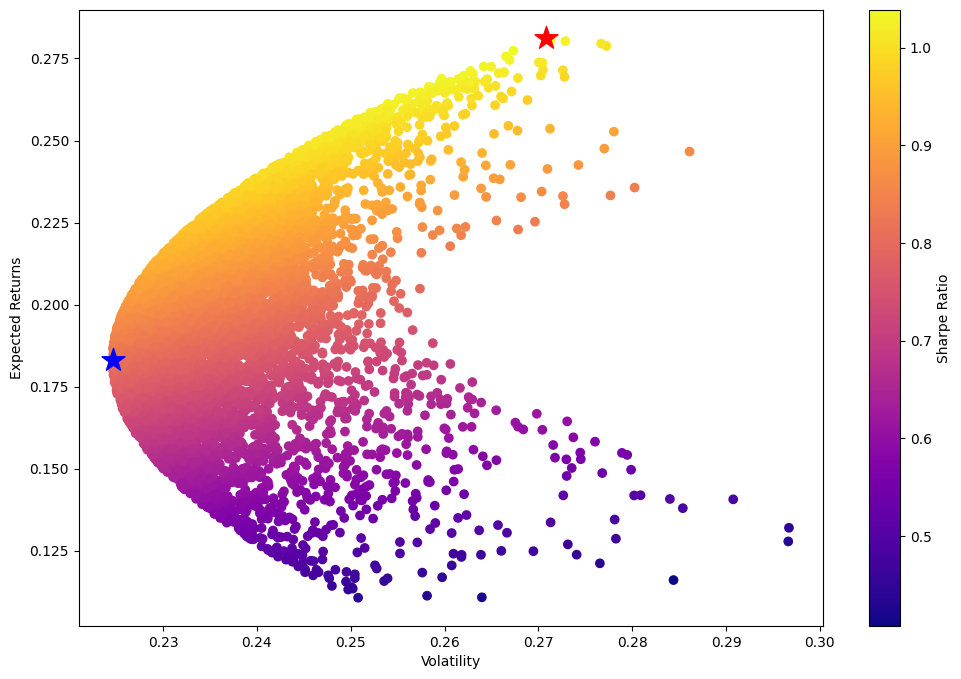

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

# Define the tickers to include in the portfolio
tickers = ['MSFT', 'ISP.MI', 'O', 'RACE']

# Download the historical prices for the tickers
df = yf.download(tickers, start='2018-01-01', end='2023-07-01')['Adj Close']

# Calculate the daily returns of the tickers
returns = df.pct_change().dropna()

# Define the optimization function
def portfolio_variance(weights, returns):
    portfolio_returns = returns.dot(weights)
    portfolio_variance = portfolio_returns.var()
    return portfolio_variance

# Define the constraint that the sum of weights equals 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Define the bounds for the weights
bounds = [(0, 1), (0, 1), (0, 1), (0, 1)]

# Define an initial guess for the weights
init_guess = [0.25, 0.25, 0.25, 0.25]

# Minimize the portfolio variance function subject to the constraints and bounds
result = minimize(portfolio_variance, init_guess, args=returns, method='SLSQP', bounds=bounds, constraints=constraints)

# Print the optimal weights
print('Optimal Weights:')
for i in range(len(tickers)):
    print('{}: {:.2%}'.format(tickers[i], result.x[i]))

# Calculate the portfolio returns and volatility with the optimal weights
portfolio_returns = returns.dot(result.x)
portfolio_volatility = portfolio_returns.std()

# Print the portfolio returns and volatility
print('Portfolio Returns: {:.2%}'.format(portfolio_returns.mean()))
print('Portfolio Volatility: {:.2%}'.format(portfolio_volatility))

# Generate random portfolios to plot the efficient frontier
num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(tickers)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for i in range(num_portfolios):
    # Generate random weights and normalize them
    weights = np.array(np.random.random(len(tickers)))
    weights = weights / np.sum(weights)

    # Save the weights
    all_weights[i,:] = weights

    # Calculate the expected returns and volatility
    ret_arr[i] = returns.dot(weights).mean() * 252
    vol_arr[i] = np.sqrt(portfolio_variance(weights, returns) * 252)

    # Calculate the Sharpe Ratio
    sharpe_arr[i] = ret_arr[i] / vol_arr[i]

# Find the portfolios with the highest Sharpe Ratio and the minimum volatility
max_sharpe_idx = np.argmax(sharpe_arr)
min_volatility_idx = np.argmin(vol_arr)

# Plot the efficient frontier
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.scatter(vol_arr[max_sharpe_idx], ret_arr[max_sharpe_idx], marker='*', s=300, c='r', label='Maximum Sharpe Ratio')
plt.scatter(vol_arr[min_volatility_idx], ret_arr[min_volatility_idx], marker='*', s=300, c='b')


The interpretation of whether the results are good or not depends on the investment objectives and risk tolerance of the investor. The optimal weights and the portfolio's expected return and volatility are based on historical data and assumptions about future market conditions. The results may change over time due to changing market conditions, company performance, and other factors. Therefore, it is important for investors to regularly review and rebalance their portfolios to ensure that they align with their investment goals and risk tolerance.

In general, a portfolio **with a higher expected return and a lower volatility is desirable**, as it represents a better risk-adjusted return. However, achieving high returns typically requires taking on higher risk. A well-diversified portfolio can help mitigate some of the risks associated with individual stocks and provide more stable returns over the long term. Therefore, it is important to evaluate the portfolio's performance against its investment objectives, risk tolerance, and the prevailing market conditions.

[*********************100%***********************]  8 of 8 completed
Optimal Weights:
MSFT: 6.28%
ISP.MI: 5.74%
O: 0.31%
RACE: 55.18%
XOM: 13.63%
EQNR: 12.72%
ENI.MI: 5.23%
SHEL: 0.90%
Portfolio Returns: 0.13%
Portfolio Volatility: 1.87%


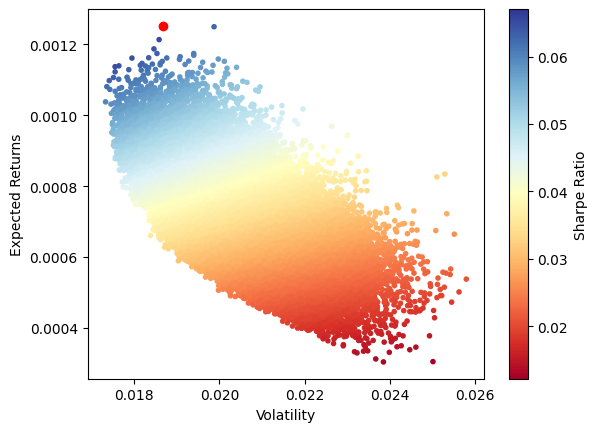

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Define the tickers
tickers = ['MSFT', 'ISP.MI', 'O', 'RACE','XOM','EQNR','ENI.MI','SHEL']

# Download the data from Yahoo Finance
data = yf.download(tickers, start='2020-01-01', end='2021-12-31')['Adj Close']

# Compute the daily returns
returns = data.pct_change()

# Compute the expected returns and covariance matrix
mu = returns.mean()
cov_matrix = returns.cov()

# Set the number of simulations for the Monte Carlo simulation
num_portfolios = 100000

# Create an array to store the portfolio weights
portfolio_weights = np.zeros((num_portfolios, len(tickers)))

# Create arrays to store the portfolio returns, volatility, and Sharpe ratio
portfolio_returns = np.zeros(num_portfolios)
portfolio_volatility = np.zeros(num_portfolios)
sharpe_ratio = np.zeros(num_portfolios)

# Run a Monte Carlo simulation to generate random portfolios
for i in range(num_portfolios):
    # Generate random weights for the portfolio
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    portfolio_weights[i,:] = weights

    # Compute the portfolio returns and volatility
    portfolio_returns[i] = np.dot(weights, mu)
    portfolio_volatility[i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Compute the Sharpe ratio
    sharpe_ratio[i] = portfolio_returns[i] / portfolio_volatility[i]

# Identify the portfolio with the highest Sharpe ratio
max_sharpe_idx = np.argmax(sharpe_ratio)
optimal_weights = portfolio_weights[max_sharpe_idx,:]

# Compute the optimal portfolio returns and volatility
optimal_returns = np.dot(optimal_weights, mu)
optimal_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))

# Print the optimal weights, returns, and volatility
print("Optimal Weights:")
for i in range(len(tickers)):
    print(tickers[i] + ": {:.2f}%".format(optimal_weights[i]*100))
print("Portfolio Returns: {:.2f}%".format(optimal_returns*100))
print("Portfolio Volatility: {:.2f}%".format(optimal_volatility*100))

# Plot the efficient frontier
plt.scatter(portfolio_volatility, portfolio_returns, c=sharpe_ratio, cmap='RdYlBu', marker='.')
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_volatility, optimal_returns, marker='o', color='red')
plt.show()